# Regressão logística

Determinar se um usuário comprou uma SUV baseado em sua idade e estimativa salarial

Dataset obtido no Kaggle (https://www.kaggle.com/hamzaalijoiyah/users-of-a-social-networks-who-bought-suv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


A coluna ID do usuário não é relevante e será removida

In [4]:
dados = dados.drop('User ID',axis=1)

In [5]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Informações iniciais da amostra

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


Verificando a existência de NaNs

In [7]:
dados.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Determinando número de clientes homens ou mulher

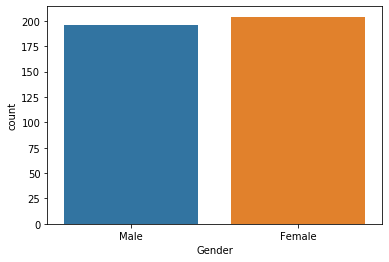

In [8]:
sns.countplot(x='Gender',data=dados)

Verificando distribuição das idades

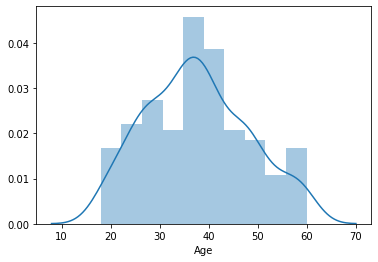

In [9]:
sns.distplot(dados['Age'])

Verificando distribuição da renda

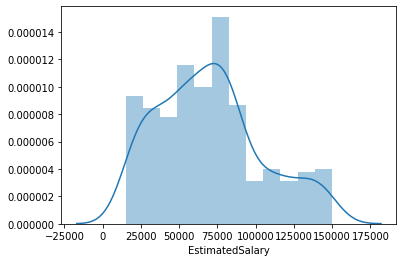

In [10]:
sns.distplot(dados['EstimatedSalary'])

Verificando quantidade de clientes quem compraram ou não SUV

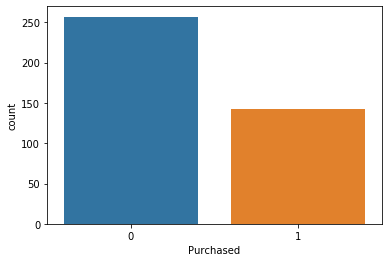

In [11]:
sns.countplot(x='Purchased',data=dados)

A coluna genero (Gender) precisa ser transformada de variável categórica para variável numérica

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
le.fit(dados['Gender'])

LabelEncoder()

In [15]:
list(le.classes_)

['Female', 'Male']

In [16]:
dados['Gender'] = le.transform(dados['Gender'])

In [17]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Normalizando os dados dos salários

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc_X=StandardScaler()

In [20]:
dados[['Age','EstimatedSalary']] = sc_X.fit_transform(dados[['Age','EstimatedSalary']])

In [21]:
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


Separando as variáveis X e Y

In [22]:
X = dados.drop('Purchased',axis=1).values
Y = dados['Purchased'].values

Separando dados em amostras de treino e teste

In [23]:
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo de regressão logística

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
modelo = LogisticRegression()

In [26]:
modelo.fit(X_treino,Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Realizando previsão na amostra de teste

In [27]:
Y_previsto = modelo.predict(X_teste)

Determinando a matriz de confusão para verificar eficácio do modelo

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [30]:
cm

array([[65,  3],
       [ 7, 25]])

Calculando as métricas do modelo

In [43]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [39]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [35]:
f1_score(Y_teste,Y_previsto)

0.8333333333333334

In [40]:
precision_score(Y_teste,Y_previsto)

0.8928571428571429

In [41]:
average_precision_score(Y_teste,Y_previsto)

0.7675446428571429

In [42]:
recall_score(Y_teste,Y_previsto)

0.78125

In [44]:
accuracy_score(Y_teste,Y_previsto)

0.9